In [1]:
%run init.ipy

from vtr import formant

2022-11-03 18:16:23.119992: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


[Memory]3.1s, 0.1min    : Loading get_aplawd_training_pairs...


[Memory]16.2s, 0.3min   : Loading run_nested...
[Memory]17.6s, 0.3min   : Loading run_nested...
[Memory]19.1s, 0.3min   : Loading run_nested...
[Memory]20.5s, 0.3min   : Loading run_nested...
[Memory]20.5s, 0.3min   : Loading get_aplawd_training_pairs...


[Memory]24.0s, 0.4min   : Loading get_vtrformants_training_pairs...
[Memory]31.1s, 0.5min   : Loading run_nested...
[Memory]32.0s, 0.5min   : Loading run_nested...
[Memory]32.9s, 0.5min   : Loading run_nested...
[Memory]33.7s, 0.6min   : Loading run_nested...
[Memory]33.7s, 0.6min   : Loading get_vtrformants_training_pairs...


In [62]:
data = formant.get_vtrformants_training_pairs()

________________________________________________________________________________
[Memory] Calling vtr.formant.get_vtrformants_training_data...
get_vtrformants_training_data()


/home/marnix/WRK/thesis/py/vtr/formant.py:89: UserWarning: /home/marnix/WRK/thesis/py/../data/TIMIT/TRAIN/DR5/MWEM0/SI1320.WAV: Discarding vowel `ax` segment at sample indices 26830:27400: segment too short for Praat's pulse estimation algorithm: To analyse this Sound, “minimum pitch” must not be less than 84.21052631578947 Hz.
Sound: pitch analysis not performed.
  warnings.warn(
/home/marnix/WRK/thesis/py/vtr/formant.py:89: UserWarning: /home/marnix/WRK/thesis/py/../data/TIMIT/TRAIN/DR5/MWEM0/SI1320.WAV: Discarding vowel `eh` segment at sample indices 42210:44440: Estimated Praat periods not within `{min|max}_period_length_msec`: [7.25   7.375  7.3125 7.4375 7.4375 7.4375 7.5625 7.5625 7.625  7.8125
 7.8125 2.0625 1.9375 1.8125 3.5    1.9375 1.9375 2.0625 1.8125 1.9375
 2.     1.9375]
  warnings.warn(
/home/marnix/WRK/thesis/py/vtr/formant.py:89: UserWarning: /home/marnix/WRK/thesis/py/../data/TIMIT/TRAIN/DR5/MWEM0/SX240.WAV: Discarding vowel `ix` segment at sample indices 2320:3043:

___________________________________get_vtrformants_training_data - 56.8s, 0.9min
________________________________________________________________________________
[Memory] Calling vtr.formant.get_vtrformants_training_pairs...
get_vtrformants_training_pairs()


[autoreload of vtr.formant failed: Traceback (most recent call last):
  File "/home/marnix/WRK/thesis/py/venv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/home/marnix/WRK/thesis/py/venv/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 848, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/marnix/WRK/thesis/py/vtr/formant.py", line 235, in <module>
    _best_fit = _fit_formants_trajectory_kernel()
  File "/home/marnix/WRK/thesis/py/vtr/formant.py", line 205, in _fit_formants_trajectory_kernel
    true_F_trajectories = [p[1] for p in training_pairs]
NameError: 

__________________________________get_vtrformants_training_pairs - 54.9s, 0.9min


Are there strong correlations (F, T)? There should be

In [63]:
TF = [np.column_stack(d[0:2]) for d in data]

[Memory]14681.6s, 244.7min: Loading get_vtrformants_training_data...
[Memory]14687.5s, 244.8min: Loading run_nested...
[Memory]14688.3s, 244.8min: Loading run_nested...
[Memory]14689.2s, 244.8min: Loading run_nested...
[Memory]14690.0s, 244.8min: Loading run_nested...
[Memory]14690.0s, 244.8min: Loading get_vtrformants_training_data...


In [64]:
TF[1000]

array([[   6.1875    ,  461.41478468, 1066.61008395, 2282.35559464],
       [   6.125     ,  480.82618723, 1060.66112556, 2284.02238786],
       [   6.25      ,  496.67202575, 1055.02936654, 2285.1629144 ],
       [   6.25      ,  498.87845272, 1051.57379285, 2285.19845009],
       [   6.3125    ,  501.49089284, 1048.1723696 , 2285.19845009],
       [   6.3125    ,  502.28571352, 1045.38769622, 2285.83212246],
       [   6.4375    ,  494.06907378, 1045.11974716, 2289.02786474],
       [   6.375     ,  489.24783887, 1041.36956446, 2295.3096047 ],
       [   6.375     ,  488.79090487, 1035.2456764 , 2302.44576098],
       [   6.4375    ,  492.61032417, 1034.29603577, 2299.65242743],
       [   6.5       ,  495.1444328 , 1031.32812163, 2299.68324172]])

In [65]:
from lib import constants

a, b = constants.MIN_FORMANT_FREQ_HZ, constants.MAX_FORMANT_FREQ_HZ
bounds = jnp.array([
    (constants.MIN_PERIOD_LENGTH_MSEC, constants.MAX_PERIOD_LENGTH_MSEC),
    (a, b),
    (a, b),
    (a, b)
])

from dgf import bijectors

stats = bijectors.get_log_stats(np.vstack(TF), bounds)

In [66]:
stats['corr']

DeviceArray([[ 1.        , -0.30919089, -0.30015941, -0.4377281 ],
             [-0.30919089,  1.        , -0.09584173,  0.22190589],
             [-0.30015941, -0.09584173,  1.        ,  0.49158755],
             [-0.4377281 ,  0.22190589,  0.49158755,  1.        ]],            dtype=float64)

In [67]:
stats

{'samples': DeviceArray([[1.86214027, 6.00669103, 7.41557913, 7.8026253 ],
              [1.87180218, 6.00669103, 7.42613012, 7.80896448],
              [1.85238409, 5.99921873, 7.43084459, 7.81742217],
              ...,
              [2.17617117, 6.25864321, 7.18655176, 7.53245878],
              [2.17617117, 6.29085054, 7.19630893, 7.57380697],
              [2.23135758, 6.31786134, 7.20435662, 7.61983915]],            dtype=float64),
 'bounds': DeviceArray([[0.69364706, 2.99568227],
              [4.60517019, 8.51719319],
              [4.60517019, 8.51719319],
              [4.60517019, 8.51719319]], dtype=float64),
 'mean': DeviceArray([1.82775922, 6.30774161, 7.37951842, 7.84894138], dtype=float64),
 'cov': DeviceArray([[ 0.10929161, -0.02559179, -0.0249454 , -0.02102249],
              [-0.02559179,  0.06268462, -0.00603226,  0.00807116],
              [-0.0249454 , -0.00603226,  0.06319611,  0.01795281],
              [-0.02102249,  0.00807116,  0.01795281,  0.02110439]],     

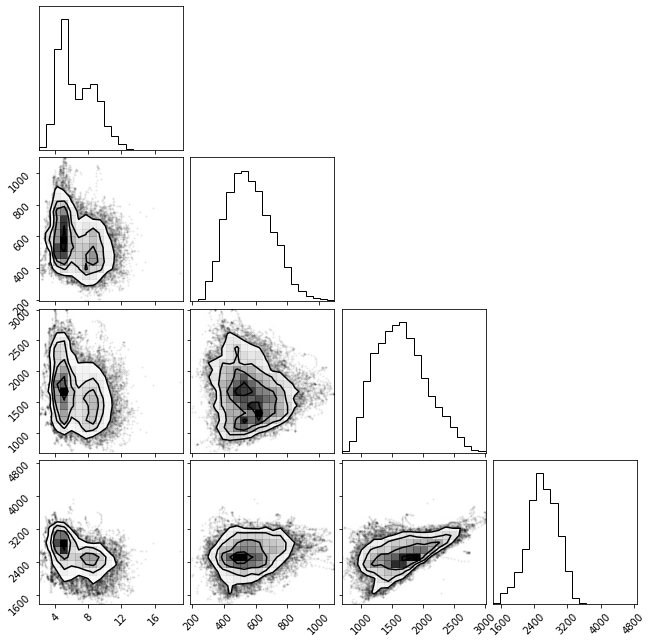

In [68]:
import corner

corner.corner(np.vstack(TF));

In [69]:
samples = np.vstack(TF)

bs, results = bijectors.fit_nonlinear_coloring_bijector(
    samples, bounds, 87846, return_fit_results=True
)

________________________________________________________________________________
[Memory] Calling dgf.bijectors.run_nested...
run_nested(87846, {'nlive': 20}, {'save_bounds': False})


530it [00:09, 56.93it/s, +20 | bound: 116 | nc: 1 | ncall: 5049 | eff(%): 10.937 | loglstar:   -inf < -742117.630 <    inf | logz: -742139.921 +/-  1.001 | dlogz:  0.001 >  0.029]


______________________________________________________run_nested - 10.3s, 0.2min


Summary
nlive: 20
niter: 530
ncall: 5029
eff(%): 10.937
logz: -742139.921 +/-  1.029


None

'Information (bans)'

8.90275671194577

Quantiles:
$x_{1}$ [(0.025, 1.0925738698075529), (0.5, 1.1010865144293107), (0.975, 1.1069882027331686)]
Quantiles:
$x_{2}$ [(0.025, 0.9958988962619847), (0.5, 1.0032045039407793), (0.975, 1.0100598870006732)]
Quantiles:
$x_{3}$ [(0.025, 1.0080023031538918), (0.5, 1.0150429339278624), (0.975, 1.0221111759724837)]
Quantiles:
$x_{4}$ [(0.025, 1.0057810468129282), (0.5, 1.0119268656324087), (0.975, 1.0194989983040001)]


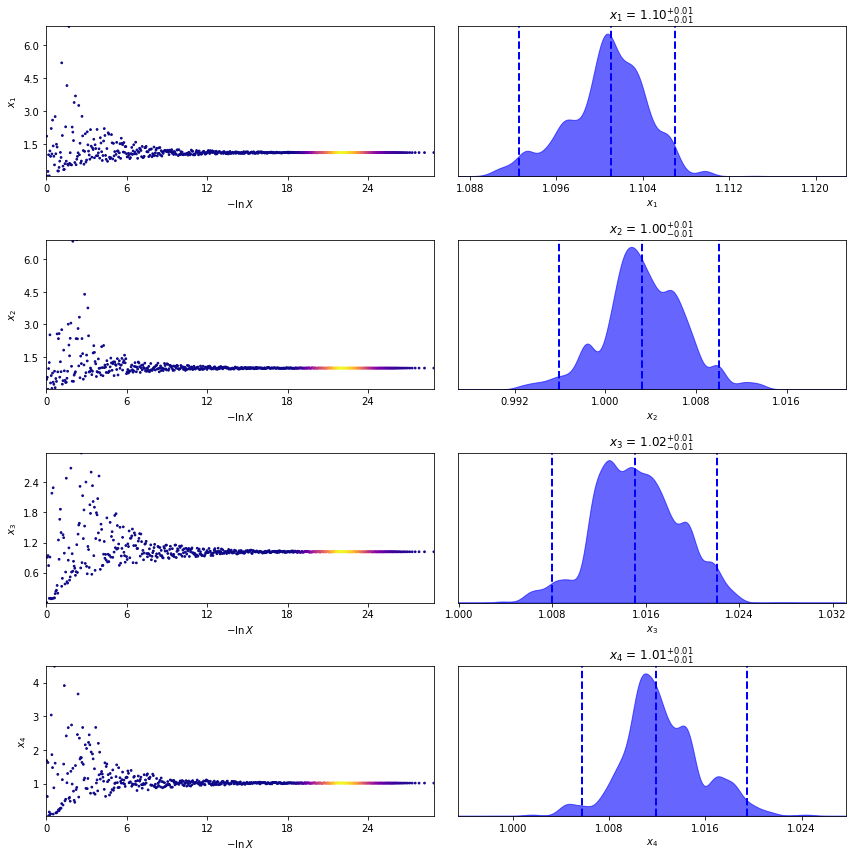

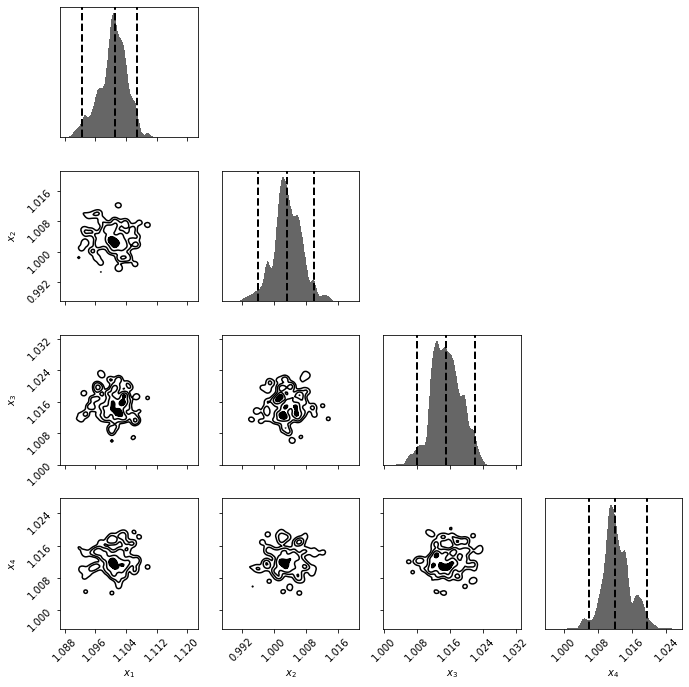

In [70]:
from lib import util

util.dyplot(results)

In [72]:
bs.forward(randn(10,4))

DeviceArray([[   5.39795628,  677.96773717, 1709.40526551, 2750.20961408],
             [   7.62371831,  534.53440252, 1769.95134681, 2601.11668364],
             [   7.74988804,  630.69054171, 1597.32292553, 3008.42105242],
             [   6.88221312,  268.57854929, 1780.76848283, 2427.27483885],
             [   6.98950886,  660.02366193, 1125.26920506, 2451.28548324],
             [  10.57151414,  316.53567385, 1005.26776329, 1844.04624192],
             [   4.10827778,  496.46164761, 1572.31054753, 2771.09032435],
             [   6.42305015,  595.9577909 ,  982.99646037, 2134.90831932],
             [  15.83870171,  250.23663647, 1404.68326875, 1832.68315712],
             [  14.69240062,  262.26116169, 1502.78838038, 2189.76732779]],            dtype=float64)